<a href="https://colab.research.google.com/github/wlin988/Colab/blob/master/3_1_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

In [2]:
from keras.layers import Conv2D, Activation, MaxPool2D, Flatten, Dense
from keras.models import Sequential

# Images fed into this model are 512 x 512 pixels with 3 channels
img_shape = (28,28,1)

# Set up model
model = Sequential()

# Add convolutional layer with 3, 3 by 3 filters and a stride size of 1
# Set padding so that input size equals output size
model.add(Conv2D(6,3,input_shape=img_shape))
# Add relu activation to the layer 
model.add(Activation('relu'))

model.add(MaxPool2D(2))

model.add(Conv2D(12,3))

model.add(Activation('relu'))

model.add(MaxPool2D(2))

model.add(Flatten())

model.add(Dense(10))

model.add(Activation('softmax'))

Using TensorFlow backend.


In [3]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 6)         60        
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 6)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 12)        660       
_________________________________________________________________
activation_2 (Activation)    (None, 11, 11, 12)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 12)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 300)              

In [4]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['acc'])

In [0]:
from keras.datasets import mnist

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [7]:
x_train.shape

(60000, 28, 28)

In [0]:
x_train = np.expand_dims(x_train,-1)

In [0]:
x_test = np.expand_dims(x_test,-1)

In [10]:
x_train.shape

(60000, 28, 28, 1)

In [11]:
y_train.shape

(60000,)

In [12]:
history = model.fit(x_train,
                    y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(x_test,y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 27s 454us/step - loss: 8.2947 - acc: 0.4711 - val_loss: 4.1263 - val_acc: 0.7138
Epoch 2/10
60000/60000 [==============================] - 26s 439us/step - loss: 0.9600 - acc: 0.9058 - val_loss: 0.1198 - val_acc: 0.9663
Epoch 3/10
60000/60000 [==============================] - 26s 435us/step - loss: 0.1111 - acc: 0.9681 - val_loss: 0.0920 - val_acc: 0.9717
Epoch 4/10
60000/60000 [==============================] - 26s 439us/step - loss: 0.0808 - acc: 0.9760 - val_loss: 0.0820 - val_acc: 0.9748
Epoch 5/10
60000/60000 [==============================] - 26s 438us/step - loss: 0.0676 - acc: 0.9795 - val_loss: 0.0584 - val_acc: 0.9823
Epoch 6/10
60000/60000 [==============================] - 26s 438us/step - loss: 0.0603 - acc: 0.9812 - val_loss: 0.0676 - val_acc: 0.9784
Epoch 7/10
600

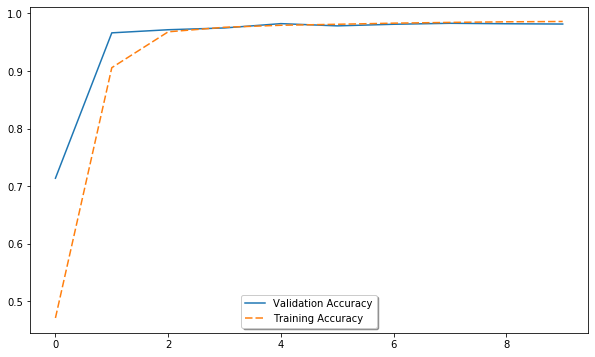

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))
gen = ax.plot(history.history['val_acc'], label='Validation Accuracy')
fr = ax.plot(history.history['acc'],dashes=[5, 2], label='Training Accuracy')

legend = ax.legend(loc='lower center', shadow=True)

plt.show()

In [14]:
history.history

{'acc': [0.4710666666666667,
  0.9058166666666667,
  0.9681,
  0.976,
  0.9794666666666667,
  0.9811833333333333,
  0.9831,
  0.9844333333333334,
  0.9854666666666667,
  0.9860666666666666],
 'loss': [8.294674343363445,
  0.9600235194183886,
  0.11110600304470088,
  0.08077786406242521,
  0.06763318543421726,
  0.0602509678635591,
  0.05450372783252969,
  0.04958709226550224,
  0.04789288487005203,
  0.04469361501426611],
 'val_acc': [0.7138,
  0.9663,
  0.9717,
  0.9748,
  0.9823,
  0.9784,
  0.9812,
  0.9829,
  0.9821,
  0.9816],
 'val_loss': [4.126325805664062,
  0.1198232180896448,
  0.09204318344488274,
  0.08196845427774824,
  0.05842712037192832,
  0.06763183210059069,
  0.06383696850189008,
  0.05463741913127596,
  0.06124635656018509,
  0.06760457505819213]}

## Regularization

In [0]:
from keras.regularizers import l2

# Set up model
model = Sequential()

# Add convolutional layer with 3, 3 by 3 filters and a stride size of 1
# Set padding so that input size equals output size
model.add(Conv2D(6,3,input_shape=img_shape, kernel_regularizer=l2(0.01)))
# Add relu activation to the layer 
model.add(Activation('relu'))

model.add(MaxPool2D(2))

model.add(Conv2D(12,3,activity_regularizer=l2(0.01)))

model.add(Activation('relu'))

model.add(MaxPool2D(2))

model.add(Flatten())

model.add(Dense(10,bias_regularizer=l2(0.01)))

model.add(Activation('softmax'))

In [0]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['acc'])

In [17]:
history = model.fit(x_train,
                    y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 27s 455us/step - loss: 9162.1861 - acc: 0.6969 - val_loss: 59.0051 - val_acc: 0.7768
Epoch 2/10
60000/60000 [==============================] - 27s 444us/step - loss: 24.2343 - acc: 0.7448 - val_loss: 8.2993 - val_acc: 0.7335
Epoch 3/10
60000/60000 [==============================] - 27s 451us/step - loss: 4.8209 - acc: 0.7133 - val_loss: 2.7819 - val_acc: 0.7160
Epoch 4/10
60000/60000 [==============================] - 27s 449us/step - loss: 2.2825 - acc: 0.7334 - val_loss: 1.8108 - val_acc: 0.7734
Epoch 5/10
60000/60000 [==============================] - 27s 449us/step - loss: 1.7443 - acc: 0.7924 - val_loss: 1.3590 - val_acc: 0.8291
Epoch 6/10
60000/60000 [==============================] - 27s 445us/step - loss: 1.5238 - acc: 0.8299 - val_loss: 1.3005 - val_acc: 0.8582
Epoch 7/10
60000/60000 [==============================] - 27s 446us/step - loss: 1.3760 - acc: 0.8465 - val_los

# Dropout

In [18]:
from keras.layers import Dropout


model = Sequential()


model.add(Conv2D(6,3,input_shape=img_shape))
model.add(Activation('relu'))
model.add(MaxPool2D(2))

model.add(Dropout(0.2))

model.add(Conv2D(12,3))
model.add(Activation('relu'))
model.add(MaxPool2D(2))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(10,bias_regularizer=l2(0.01)))

model.add(Activation('softmax'))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['acc'])

In [20]:
history = model.fit(x_train,
                    y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 29s 483us/step - loss: 7.7556 - acc: 0.5046 - val_loss: 6.4224 - val_acc: 0.5934
Epoch 2/10
60000/60000 [==============================] - 29s 477us/step - loss: 4.3750 - acc: 0.6788 - val_loss: 0.1785 - val_acc: 0.9479
Epoch 3/10
60000/60000 [==============================] - 28s 471us/step - loss: 0.2477 - acc: 0.9242 - val_loss: 0.1041 - val_acc: 0.9701
Epoch 4/10
60000/60000 [==============================] - 28s 468us/step - loss: 0.1732 - acc: 0.9466 - val_loss: 0.0719 - val_acc: 0.9766
Epoch 5/10
60000/60000 [==============================] - 28s 463us/step - loss: 0.1475 - acc: 0.9550 - val_loss: 0.0713 - val_acc: 0.9808
Epoch 6/10
60000/60000 [==============================] - 28s 459us/step - loss: 0.1262 - acc: 0.9602 - val_loss: 0.0642 - val_acc: 0.9787
Epoch 7/10
60000/60000 [==============================] - 28s 466us/step - loss: 0.1209 - acc: 0.9613 - val_loss: 0.

In [21]:
from keras.layers import BatchNormalization


model = Sequential()


model.add(Conv2D(6,3,input_shape=img_shape))
model.add(Activation('relu'))
model.add(MaxPool2D(2))

model.add(BatchNormalization())

model.add(Conv2D(12,3))
model.add(Activation('relu'))
model.add(MaxPool2D(2))

model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(10,bias_regularizer=l2(0.01)))

model.add(Activation('softmax'))

In [0]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['acc'])

In [23]:
history = model.fit(x_train,
                    y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 33s 545us/step - loss: 0.2120 - acc: 0.9367 - val_loss: 0.0726 - val_acc: 0.9772
Epoch 2/10
60000/60000 [==============================] - 32s 527us/step - loss: 0.0733 - acc: 0.9773 - val_loss: 0.0530 - val_acc: 0.9847
Epoch 3/10
60000/60000 [==============================] - 32s 529us/step - loss: 0.0576 - acc: 0.9820 - val_loss: 0.0525 - val_acc: 0.9847
Epoch 4/10
60000/60000 [==============================] - 32s 531us/step - loss: 0.0492 - acc: 0.9852 - val_loss: 0.0460 - val_acc: 0.9862
Epoch 5/10
60000/60000 [==============================] - 32s 538us/step - loss: 0.0442 - acc: 0.9858 - val_loss: 0.0467 - val_acc: 0.9859
Epoch 6/10
60000/60000 [==============================] - 32s 539us/step - loss: 0.0400 - acc: 0.9876 - val_loss: 0.0453 - val_acc: 0.9861
Epoch 7/10
60000/60000 [==============================] - 32s 536us/step - loss: 0.0373 - acc: 0.9880 - val_loss: 0.

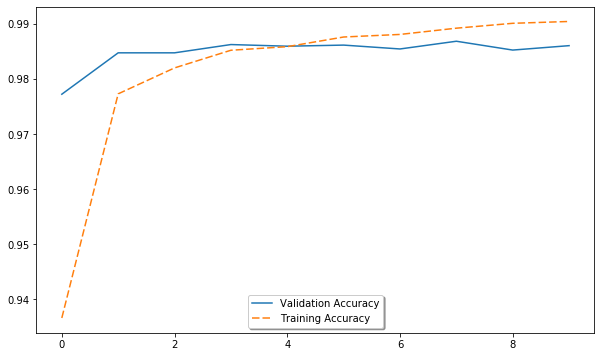

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))
gen = ax.plot(history.history['val_acc'], label='Validation Accuracy')
fr = ax.plot(history.history['acc'],dashes=[5, 2], label='Training Accuracy')

legend = ax.legend(loc='lower center', shadow=True)

plt.show()